Dataset Shape: (569, 31)

Class Distribution:
target
1    357
0    212
Name: count, dtype: int64
Processing Sample S1
Processing Sample S2
Processing Sample S3
Processing Sample S4
Processing Sample S5
Processing Sample S6
Processing Sample S7
Processing Sample S8
Processing Sample S9
Processing Sample S10
  Sample  Best Accuracy                      Best SVM Parameters
0     S1          96.12   Kernel: linear, Nu: 0.16, Gamma: scale
1     S2          95.15   Kernel: sigmoid, Nu: 0.3, Gamma: 0.905
2     S3          93.20    Kernel: linear, Nu: 0.1, Gamma: scale
3     S4          94.17   Kernel: linear, Nu: 0.21, Gamma: scale
4     S5          94.17   Kernel: linear, Nu: 0.22, Gamma: scale
5     S6          92.23   Kernel: linear, Nu: 0.11, Gamma: scale
6     S7          93.20  Kernel: sigmoid, Nu: 0.46, Gamma: 0.506
7     S8          94.17   Kernel: linear, Nu: 0.19, Gamma: scale
8     S9          91.26   Kernel: linear, Nu: 0.08, Gamma: scale
9    S10          95.15   Kernel: linear, 

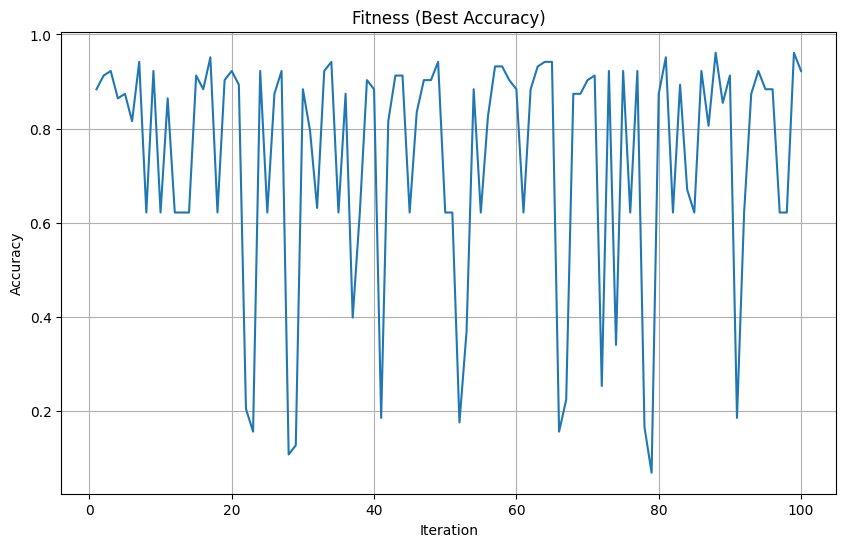

<Figure size 640x480 with 0 Axes>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils import shuffle
from sklearn.svm import NuSVC
import random
from sklearn.datasets import load_breast_cancer

# Load the breast cancer dataset
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = cancer.target

# Create a dataframe for printing information
df = X.copy()
df['target'] = y

print("Dataset Shape:", df.shape)
print("\nClass Distribution:")
print(df['target'].value_counts())

# Make the problem more challenging by:
# 1. Reducing the number of samples
# 2. Adding noise to the features
np.random.seed(42)
sample_indices = np.random.choice(len(X), size=int(len(X)*0.6), replace=False)
X = X.iloc[sample_indices]
y = y[sample_indices]

# Add noise to features
X = X + np.random.normal(0, 0.8, size=X.shape)

# Scale features
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
samples = []
convergence_data = {}

for i in range(10):
    print(f"Processing Sample S{i+1}")
    X_shuffled, y_shuffled = shuffle(X, y, random_state=i)
    X_train, X_test, y_train, y_test = train_test_split(X_shuffled, y_shuffled, test_size=0.3, random_state=i)

    best_acc = 0
    best_params = None
    acc_progress = []

    for iteration in range(100):
        kernel = random.choice(kernels)
        nu = round(random.uniform(0.01, 0.5), 2)
        gamma = 'scale' if kernel == 'linear' else round(random.uniform(0.001, 1), 3)

        try:
            model = NuSVC(kernel=kernel, nu=nu, gamma=gamma)
            model.fit(X_train, y_train)
            preds = model.predict(X_test)
            acc = accuracy_score(y_test, preds)
            acc_progress.append(acc)

            if acc > best_acc:
                best_acc = acc
                best_params = (kernel, nu, gamma)

        except Exception as e:
            # Keep previous best accuracy
            acc_progress.append(best_acc if acc_progress else 0)
            continue

    samples.append({
        'Sample': f"S{i+1}",
        'Best Accuracy': round(best_acc * 100, 2),
        'Best SVM Parameters': f"Kernel: {best_params[0]}, Nu: {best_params[1]}, Gamma: {best_params[2]}" if best_params else "None"
    })

    convergence_data[f"S{i+1}"] = acc_progress

result_df = pd.DataFrame(samples)
print(result_df)

# Best performing sample
if not result_df.empty:
    best_sample = result_df.loc[result_df['Best Accuracy'].idxmax(), 'Sample']
    print(f"Best Sample: {best_sample}")

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(convergence_data[best_sample])+1), convergence_data[best_sample])
    plt.title("Fitness (Best Accuracy)")
    plt.xlabel("Iteration")
    plt.ylabel("Accuracy")
    plt.grid(True)
    plt.show()

    plt.savefig("convergence_plot.png")
else:
    print("No valid results were produced")